# Multispectral Image

## Imports

In [109]:
import rasterio as rs
import matplotlib.pyplot as plt
import numpy as np
from rasterio.enums import Resampling
import gdal

## Viewing the image

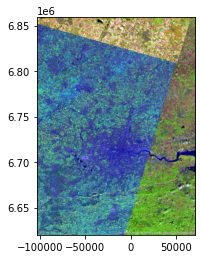

File driver: GTiff


In [101]:
img = rs.open('multispectral.tif')
rs.plot.show(img)
profile = img.profile
data = img.read()
print('File driver: ' + profile['driver'])

## RGB representations

In [102]:
print(f'Number of bands: {img.count}')

Number of bands: 4


In [103]:
b1 = img.read(1)
b2 = img.read(2)
b3 = img.read(3)

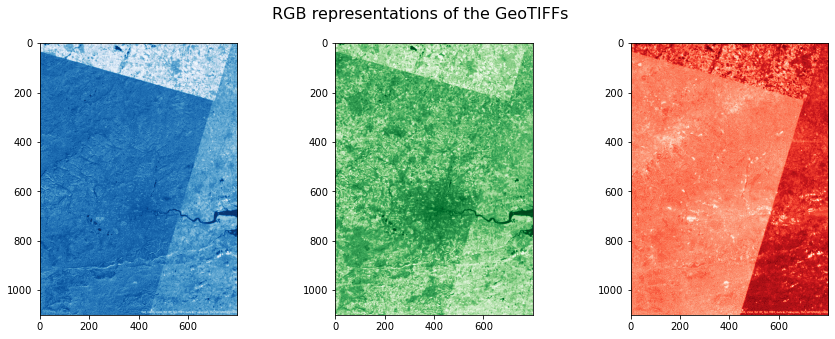

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("RGB representations of the GeoTIFFs", fontsize=16)
ax[0].imshow(b1, cmap='Blues_r')
ax[1].imshow(b2, cmap='Greens_r')
ax[2].imshow(b3, cmap='Reds_r')

## Creating a thumbnail

In [107]:
def thumbnail(img, data):

    data = img.read(
        out_shape=(
            img.count,
            500,
            500
        ), 
       resampling=Resampling.bilinear 
    )

    transform = img.transform * img.transform.scale(
        (img.width / data.shape[-1]),
        (img.height / data.shape[-2])
    )

    return data

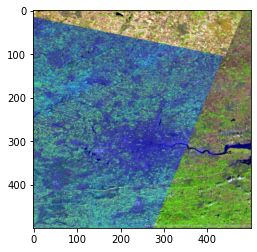

<AxesSubplot: >

In [113]:
small = thumbnail(img, data)
rs.plot.show(small)